Implement the fragmentation scheme in reverse to 'grow' some particles.

### Cozar Scheme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def fragmentation_event(L, k, fragmentation_mode):
    """
    L: lenght of cube
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    new_L = L*fragmentation_mode
    k += 1
    
    return new_L, k

In [3]:
def defragmentation_event(V, k, fragmentation_mode):
    """
    V: volume of sphere
    k: size class. 0 if original
    fragmentation_mode: 1/2 if it breaks in two in a fragmentation event.
    """
    new_V = V/fragmentation_mode
    k += 1
    
    return new_V, k

In [124]:
def fragmentation(V, k, dt, fragmentation_mode, fragmentation_timescale):
    fragmentation_prob = math.exp(-dt/(fragmentation_timescale))
    rnd_num = np.random.rand()
    
    if rnd_num > fragmentation_prob:
        V, k = defragmentation_event(V, k, fragmentation_mode)
        
    return V, k 

In [125]:
24*60*60*365

31536000

In [126]:
100*24*60*60

8640000

In [133]:
r = 1e-7 # 100nm
k = 0
sim_time = 365*10
N = sim_time
V = 4/3 * np.pi*r**3
mode = 1/2
frag_timescale = 100
frag_mode = 1/2
k = 0

time = np.linspace(0, sim_time, N)
dt = time[1] - time[0]

radiuses = np.zeros(N)
volumes = np.zeros(N)

radiuses[0] = r
volumes[0] = V
print(-dt/(frag_timescale))

for i, t in enumerate(time):
    V, k = fragmentation(V, k, dt, frag_mode, frag_timescale)
    volumes[i] = V
    radiuses[i] = np.cbrt(3*V/(4*np.pi))
    

-0.010002740476842971


In [134]:
time.shape

(3650,)

Text(0.5, 1.0, 'Fragmentation timescale = 100 . Mode = 0.5')

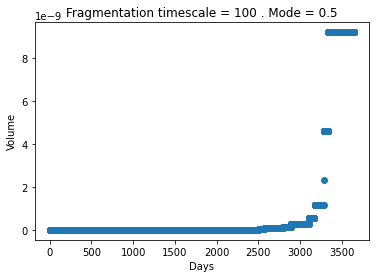

In [138]:
plt.scatter(time, volumes)
plt.xlabel('Days')
plt.ylabel('Volume')
plt.title('Fragmentation timescale = 100 . Mode = 0.5')
#plt.scatter(time, radiuses)